In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idx_tools import Idx
#from plot_data import Results
import tensorflow as tf
from tensorflow import keras
import os
import cv2

from PIL import Image

%matplotlib inline

In [10]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename,"r") 
class_names =  [str.split(x) for x in file.readlines()]

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


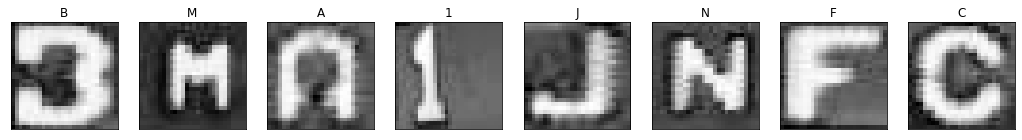

In [11]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 8

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='Greys')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(class_names[train_labels[image_num]][0])

In [12]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# How many categories do we have in the dataset
n_categories = len(class_names)

# What are the dimensions of each image
x_size = train_images.shape[1]
y_size = train_images.shape[2]

In [5]:
# Design the MLP architecture. 1st model
#model_2 = keras.Sequential([
   # keras.layers.Flatten(input_shape=(x_size, y_size)),
    #keras.layers.Dropout(0.2, input_shape=(x_size, y_size)),
   # keras.layers.Dense(256, activation=tf.nn.relu),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dense(80, activation=tf.nn.relu),
   # keras.layers.Dense(n_categories, activation=tf.nn.softmax)
#])

# Compile the model
#model_2.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
             # metrics=['accuracy'])

In [13]:
# Design the MLP architecture. 2nd model
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_size, y_size)),
    keras.layers.Dropout(0.5, input_shape=(x_size, y_size)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3, input_shape=(x_size, y_size)),
    keras.layers.Dense(80, activation=tf.nn.relu),
    keras.layers.Dense(n_categories, activation=tf.nn.softmax)
])

# Compile the model
#model_2.compile(optimizer='adam',
              ##loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

model_2.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy'])


In [14]:
history_2 = model_2.fit(train_images, train_labels, epochs=200, verbose=1)


Epoch 1/200
55731/55731 [==============================] - 3s 55us/sample - loss: 3.1225 - acc: 0.0783
Epoch 2/200
55731/55731 [==============================] - 3s 53us/sample - loss: 2.8588 - acc: 0.1620
Epoch 3/200
55731/55731 [==============================] - 3s 53us/sample - loss: 2.4344 - acc: 0.2983
Epoch 4/200
55731/55731 [==============================] - 3s 53us/sample - loss: 1.9825 - acc: 0.4284
Epoch 5/200
55731/55731 [==============================] - 3s 53us/sample - loss: 1.6022 - acc: 0.5323
Epoch 6/200
55731/55731 [==============================] - 3s 53us/sample - loss: 1.3241 - acc: 0.6082
Epoch 7/200
55731/55731 [==============================] - 3s 53us/sample - loss: 1.1142 - acc: 0.6687
Epoch 8/200
55731/55731 [==============================] - 3s 54us/sample - loss: 0.9547 - acc: 0.7167
Epoch 9/200
55731/55731 [==============================] - 3s 54us/sample - loss: 0.8333 - acc: 0.7518
Epoch 10/200
55731/55731 [==============================] - 3s 54us/sampl

55731/55731 [==============================] - 3s 53us/sample - loss: 0.1143 - acc: 0.9659
Epoch 80/200
55731/55731 [==============================] - 3s 54us/sample - loss: 0.1149 - acc: 0.9654
Epoch 81/200
55731/55731 [==============================] - 3s 54us/sample - loss: 0.1141 - acc: 0.9662
Epoch 82/200
55731/55731 [==============================] - 3s 54us/sample - loss: 0.1143 - acc: 0.9658
Epoch 83/200
55731/55731 [==============================] - 3s 56us/sample - loss: 0.1143 - acc: 0.9663
Epoch 84/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.1129 - acc: 0.9662
Epoch 85/200
55731/55731 [==============================] - 3s 56us/sample - loss: 0.1114 - acc: 0.9673
Epoch 86/200
55731/55731 [==============================] - 3s 61us/sample - loss: 0.1096 - acc: 0.9678
Epoch 87/200
55731/55731 [==============================] - 3s 62us/sample - loss: 0.1078 - acc: 0.9677
Epoch 88/200
55731/55731 [==============================] - 3s 54us/sample - 

55731/55731 [==============================] - 3s 55us/sample - loss: 0.0748 - acc: 0.9776
Epoch 158/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0801 - acc: 0.9759
Epoch 159/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0773 - acc: 0.9764
Epoch 160/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0757 - acc: 0.9769
Epoch 161/200
55731/55731 [==============================] - 3s 56us/sample - loss: 0.0762 - acc: 0.9769
Epoch 162/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0774 - acc: 0.9758
Epoch 163/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0774 - acc: 0.9771
Epoch 164/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0764 - acc: 0.9767
Epoch 165/200
55731/55731 [==============================] - 3s 55us/sample - loss: 0.0745 - acc: 0.9772
Epoch 166/200
55731/55731 [==============================] - 3s 57us/

In [15]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

23888/23888 [==============================] - 1s 23us/sample - loss: 0.0142 - acc: 0.9969
Test accuracy: 0.9969022
Test loss: 0.014216115946358562


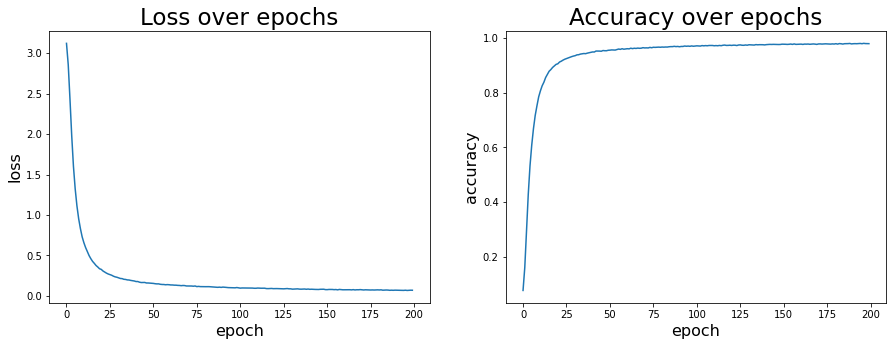

In [16]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the data
ax[0].plot(history_2.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history_2.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

In [17]:
# Modified from: https://www.tensorflow.org/tutorials/keras/basic_classification

import matplotlib.pyplot as plt
import numpy as np




   
def plot_image(i, predictions_array, true_label, img, category_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(category_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         category_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label, n_categories):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(n_categories), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')

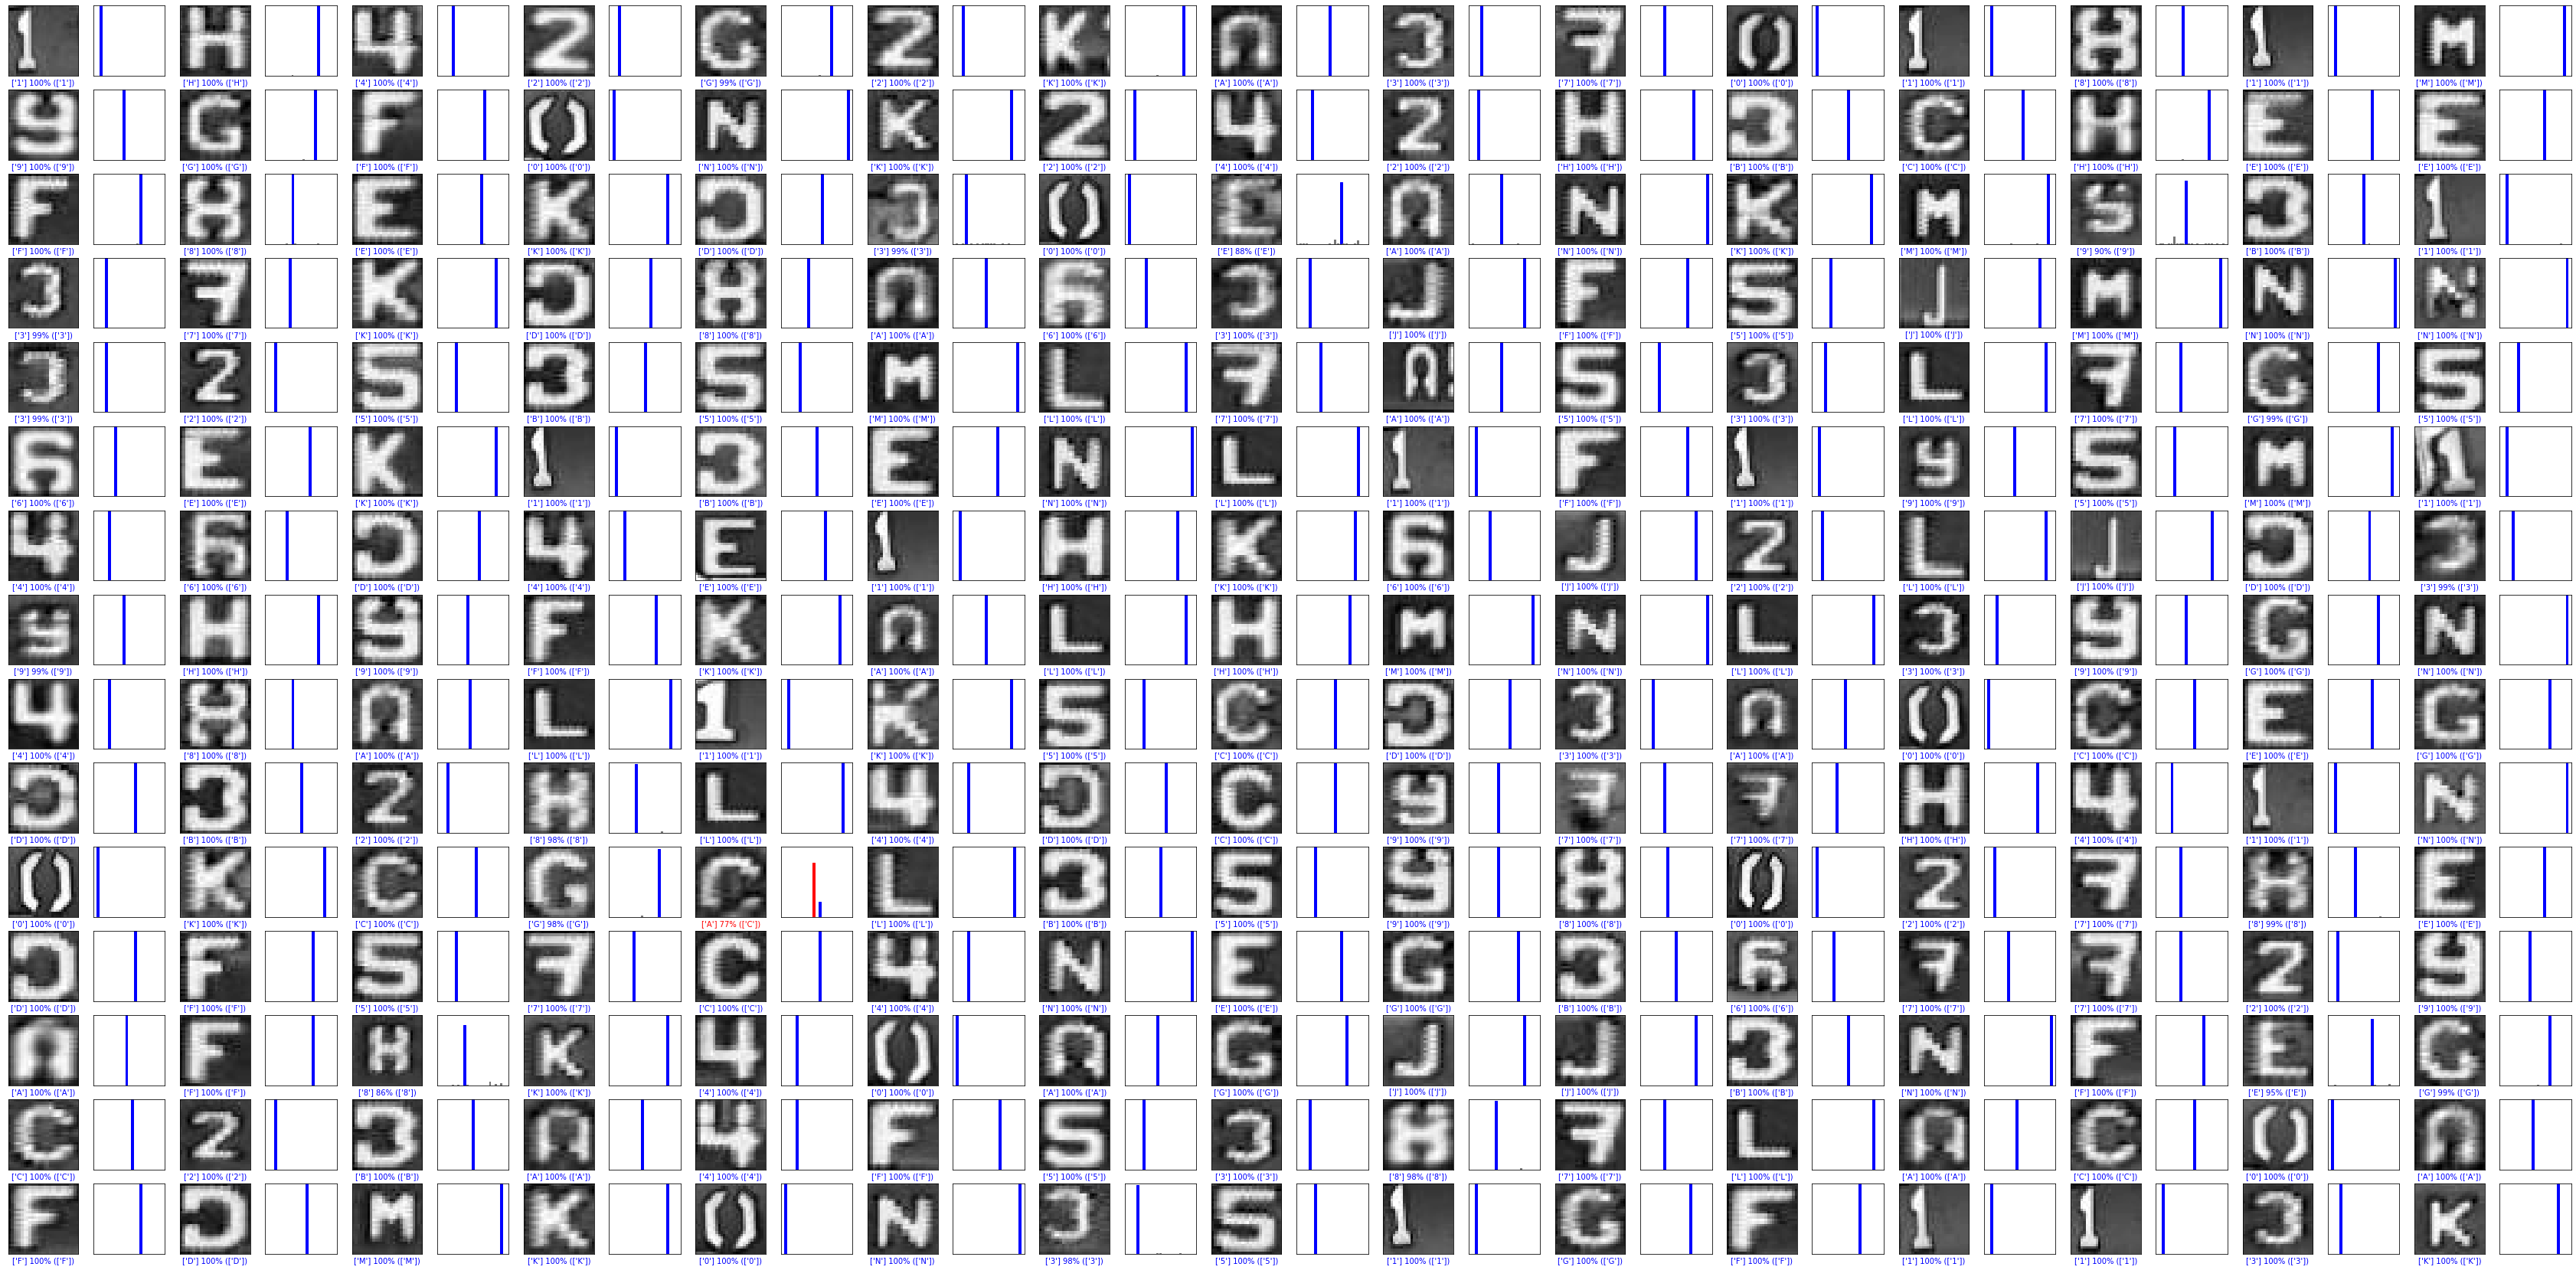

In [18]:
# Use the model to make predictions on the test images
predictions = model_2.predict(test_images)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 15
num_cols = 15
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

In [74]:
img = cv2.imread('test_E.jpg', cv2.IMREAD_GRAYSCALE)
#test_0 = test_0/255.0
#test_0 = cv2.resize(test_0, (28,28))
img = np.array(img)
img = 255 - img
img = img / 255

In [75]:
result_E = model_2.predict_classes(img.reshape(1, 28, 28), verbose=1)

1/1 [==============================] - 0s 0s/sample


In [62]:
result_3

array([3], dtype=int64)

In [76]:
print(class_names[result_E[0]])

['E']


In [21]:
if not os.path.isdir('./model_2'):
    os.mkdir('./model_2')

# Save the model structure to JSON file
model_2_json = model_2.to_json()
with open("./model_2/model_2.json", "w") as json_file:
    json_file.write(model_2_json)

# Save weights to HDF5 file
model_2.save_weights("./model_2/model_2.h5")
print("Model_2 saved")

Model_2 saved
